Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

# #1
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [1]:
### Imports ###
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer

from wrangle import wrangle_zillow
from wrangle import plot_scaled_unscaled
from wrangle import zillow_standard_scaler

In [2]:
### Bring in Zillow data ###
zillow = wrangle_zillow()
zillow.head()

,beds,baths,area,worth,built,tax,locality
7,3,2,2077,646760,1926,7924.68,06037
18,3,1,1244,169471,1950,2532.88,06037
19,3,2,1300,233266,1950,3110.99,06037
20,3,2,1222,290492,1951,3870.25,06037
40,2,1,725,37548,1953,576.47,06037


In [3]:
### Split Data ###
train_and_validate, test = train_test_split(zillow, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

train.shape, test.shape, validate.shape

((1386340, 7), (214826, 7), (189047, 7))

In [4]:
### Build Scalers ###
minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()
robustscaler = RobustScaler()

In [5]:
### Set Columns to Scale ###
zillow.columns
cols = ['beds', 'baths', 'area', 'worth', 'tax']

In [6]:
### Fit Scalers ###
minmaxscaler.fit(train[cols])
standardscaler.fit(train[cols])
robustscaler.fit(train[cols])

RobustScaler()

In [7]:
### Transform Scaled Values to Arrays ###
scaled_minmax = minmaxscaler.transform(train[cols])
scaled_standard = standardscaler.transform(train[cols])
scaled_robust = robustscaler.transform(train[cols])

In [8]:
### Set Scaled Column Names ###
cols_scaled = ['beds_scaled', 'baths_scaled', 'area_scaled', 'worth_scaled', 'tax_scaled']

In [9]:
### Create New Dataframe For MinMaxScaler ###
train_minmax = train[cols].copy()

In [10]:
### Assign Array To Dataframe ###
train_minmax[cols_scaled] = scaled_minmax
train_minmax.head()

,beds,baths,area,worth,tax,beds_scaled,baths_scaled,area_scaled,worth_scaled,tax_scaled
783044,4,2,2803,104591,1479.32,0.666667,0.333333,0.821701,0.110087,0.141870
1083951,4,2,1505,216698,2851.41,0.666667,0.333333,0.441056,0.228109,0.275143
1061250,3,2,1299,65230,919.28,0.333333,0.333333,0.380645,0.068649,0.087473
1538638,4,2,3005,125194,1322.98,0.666667,0.333333,0.880938,0.131777,0.126685
1185559,3,2,1310,153604,1878.88,0.333333,0.333333,0.383871,0.161686,0.180680


In [11]:
### Create New Dataframe for StandardScaler ###
train_standard = train[cols].copy()

In [12]:
### Assign Array To Dataframe ###
train_standard[cols_scaled] = scaled_standard
train_standard.head()

,beds,baths,area,worth,tax,beds_scaled,baths_scaled,area_scaled,worth_scaled,tax_scaled
783044,4,2,2803,104591,1479.32,1.003067,-0.019015,2.043709,-1.129801,-1.163479
1083951,4,2,1505,216698,2851.41,1.003067,-0.019015,-0.264447,-0.562871,-0.546387
1061250,3,2,1299,65230,919.28,-0.282619,-0.019015,-0.630765,-1.328851,-1.415355
1538638,4,2,3005,125194,1322.98,1.003067,-0.019015,2.402914,-1.025611,-1.233792
1185559,3,2,1310,153604,1878.88,-0.282619,-0.019015,-0.611204,-0.881940,-0.983779


In [13]:
### Create New Dataframe for RobustScaler ###
train_robust = train[cols].copy()

In [14]:
### Assign Array To Dataframe ###
train_robust[cols_scaled] = scaled_robust
train_robust.head()

,beds,baths,area,worth,tax,beds_scaled,baths_scaled,area_scaled,worth_scaled,tax_scaled
783044,4,2,2803,104591,1479.32,1.0,0.0,1.665339,-0.695312,-0.733402
1083951,4,2,1505,216698,2851.41,1.0,0.0,-0.058433,-0.290898,-0.290274
1061250,3,2,1299,65230,919.28,0.0,0.0,-0.332005,-0.837303,-0.914271
1538638,4,2,3005,125194,1322.98,1.0,0.0,1.933599,-0.620989,-0.783893
1185559,3,2,1310,153604,1878.88,0.0,0.0,-0.317397,-0.518503,-0.604361


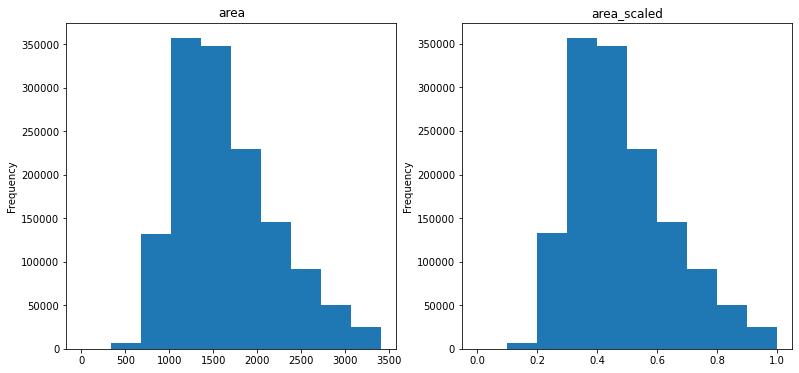

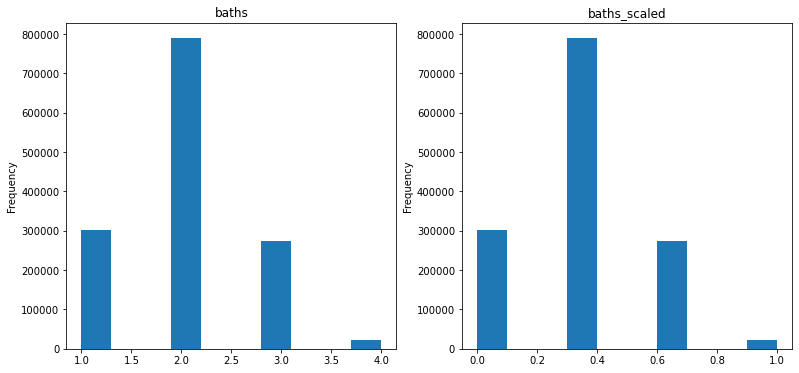

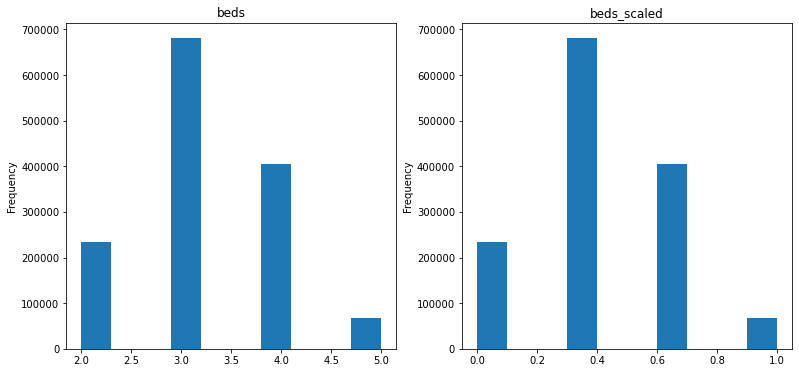

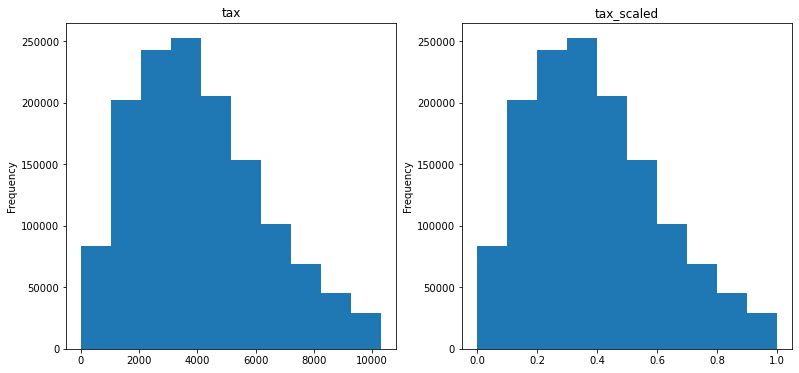

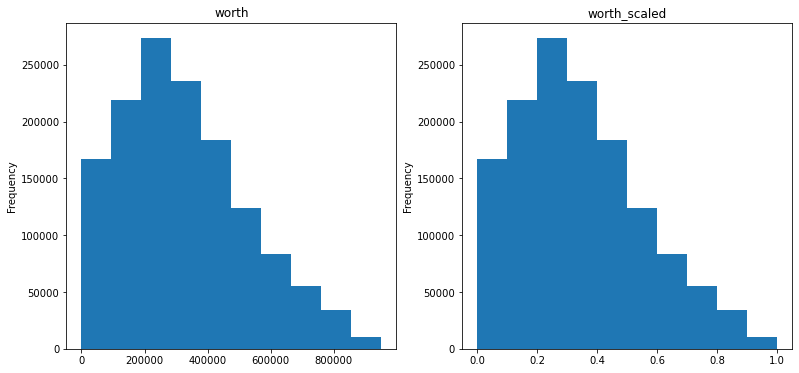

In [15]:
### Call Helper Function To Plot Scaled/Unscaled Distributions ###
plot_scaled_unscaled(train_minmax)

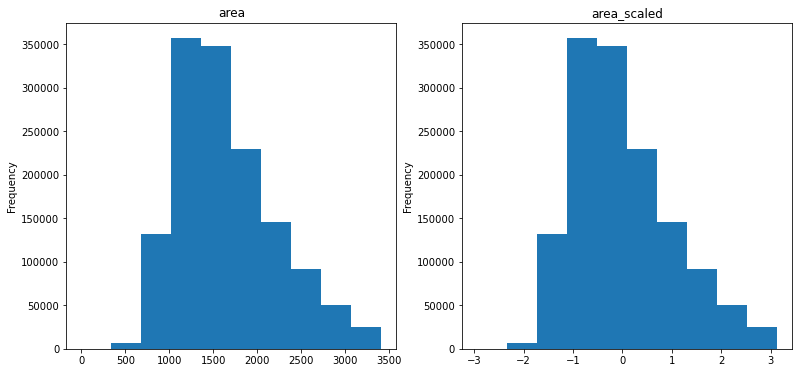

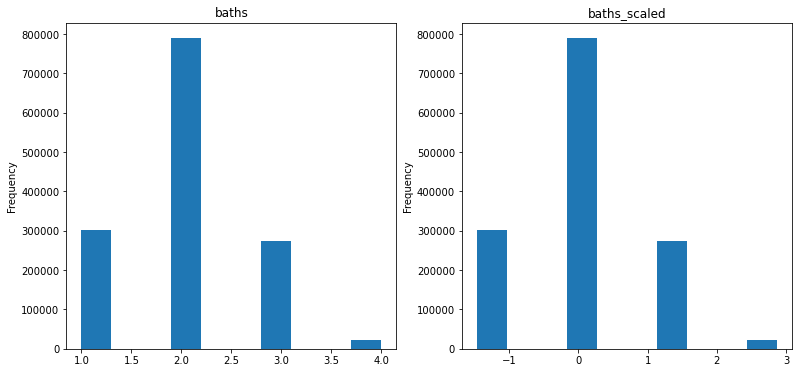

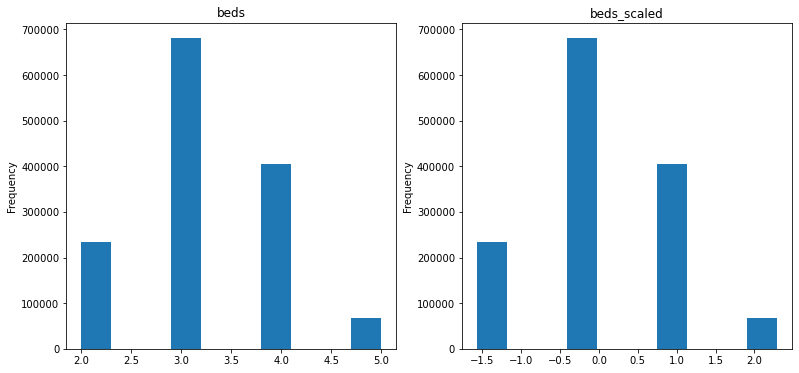

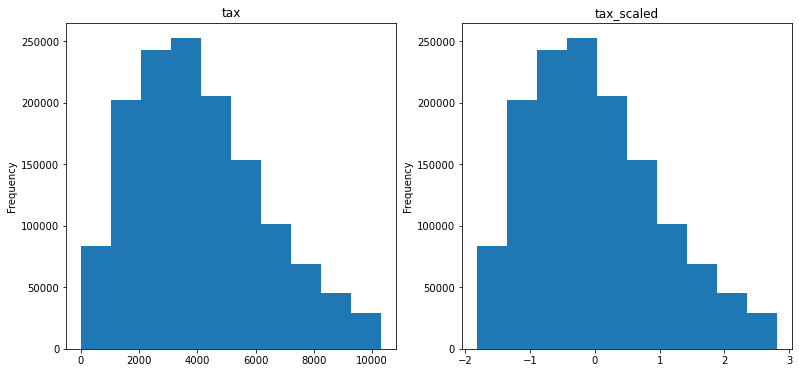

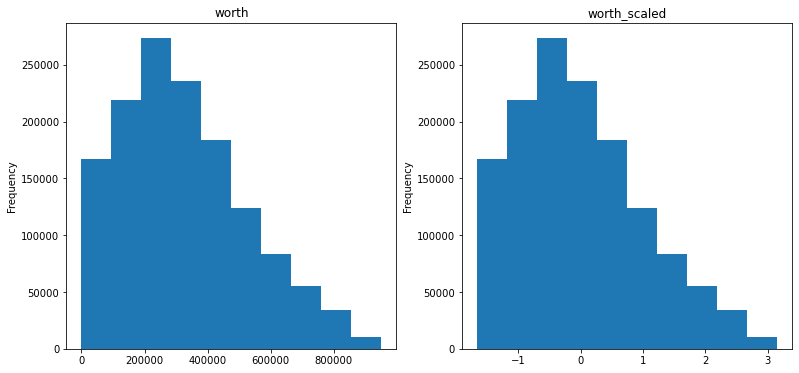

In [16]:
plot_scaled_unscaled(train_standard)

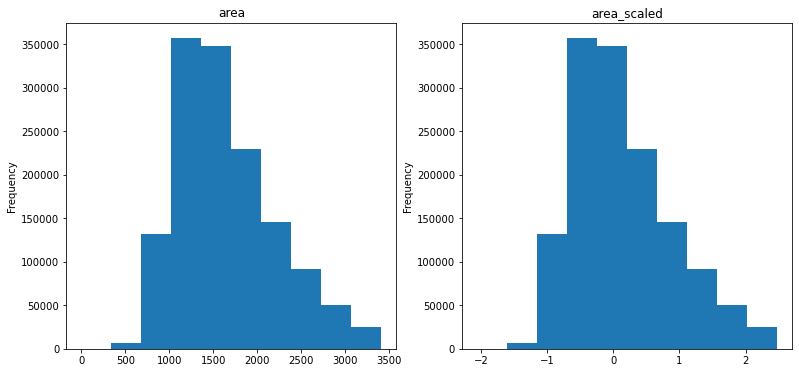

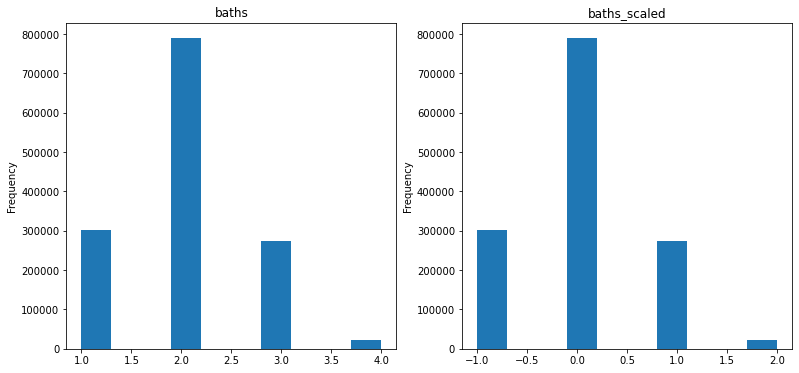

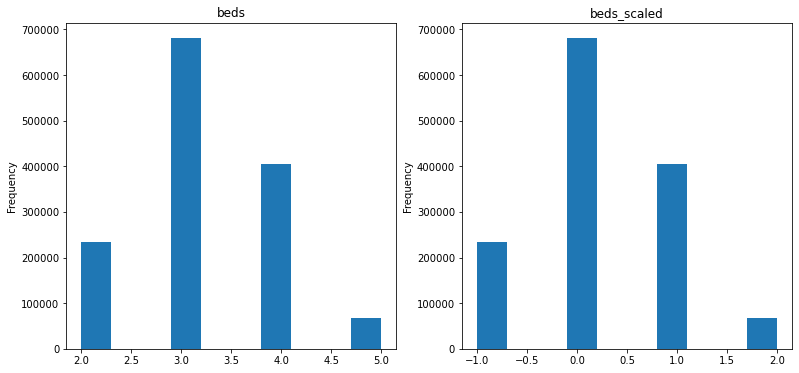

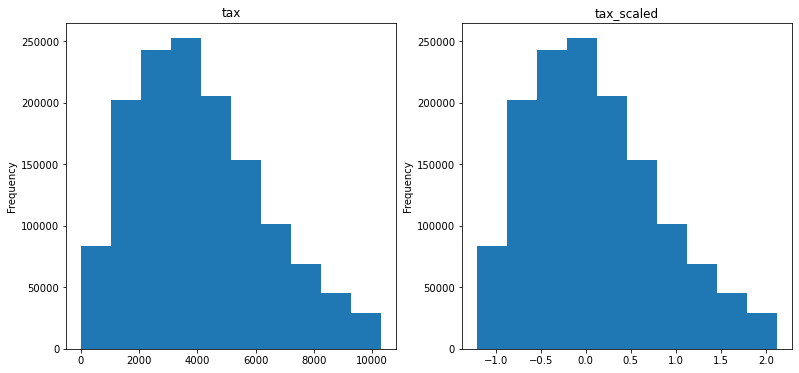

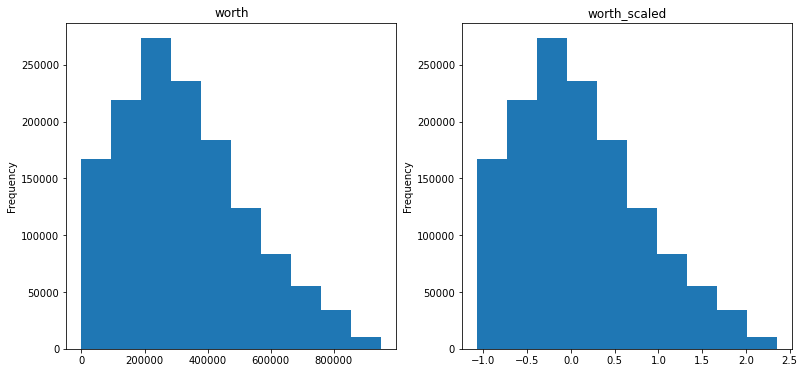

In [17]:
plot_scaled_unscaled(train_robust)

# #2
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [18]:
### New Columns For Un-Scaled Values ###
cols_unscaled = ['beds_unscaled', 'baths_unscaled', 'area_unscaled', 
                 'worth_unscaled', 'tax_unscaled']

In [19]:
### Assign Array To Dataframe ###
train_minmax[cols_unscaled] = minmaxscaler.inverse_transform(scaled_minmax)
train_minmax.head(3)

,beds,baths,area,worth,tax,beds_scaled,baths_scaled,area_scaled,worth_scaled,tax_scaled,beds_unscaled,baths_unscaled,area_unscaled,worth_unscaled,tax_unscaled
783044,4,2,2803,104591,1479.32,0.666667,0.333333,0.821701,0.110087,0.141870,4.0,2.0,2803.0,104591.0,1479.32
1083951,4,2,1505,216698,2851.41,0.666667,0.333333,0.441056,0.228109,0.275143,4.0,2.0,1505.0,216698.0,2851.41
1061250,3,2,1299,65230,919.28,0.333333,0.333333,0.380645,0.068649,0.087473,3.0,2.0,1299.0,65230.0,919.28


In [20]:
### Check for Equal Values ###
train_minmax[
    train_minmax['worth_unscaled'].astype('int') 
    != 
    train_minmax['worth']][['worth','worth_unscaled']].head(3)

,worth,worth_unscaled
1537585,509154,509154.0
1153764,261692,261692.0
1770621,243504,243504.0


Although values are marked not-equal, they appear to be near-equal.

In [21]:
### Assign Array To Dataframe ###
train_standard[cols_unscaled] = standardscaler.inverse_transform(scaled_standard)
train_standard.head(3)

,beds,baths,area,worth,tax,beds_scaled,baths_scaled,area_scaled,worth_scaled,tax_scaled,beds_unscaled,baths_unscaled,area_unscaled,worth_unscaled,tax_unscaled
783044,4,2,2803,104591,1479.32,1.003067,-0.019015,2.043709,-1.129801,-1.163479,4.0,2.0,2803.0,104591.0,1479.32
1083951,4,2,1505,216698,2851.41,1.003067,-0.019015,-0.264447,-0.562871,-0.546387,4.0,2.0,1505.0,216698.0,2851.41
1061250,3,2,1299,65230,919.28,-0.282619,-0.019015,-0.630765,-1.328851,-1.415355,3.0,2.0,1299.0,65230.0,919.28


In [22]:
### Check for Equal Values ###
train_standard[
    train_standard['worth_unscaled'].astype('int') 
    != 
    train_standard['worth']][['worth','worth_unscaled']].head(3)

,worth,worth_unscaled
672967,127682,127682.0
1234704,78780,78780.0
1788698,80718,80718.0


In [23]:
### Assign Array To Dataframe ###
train_robust[cols_unscaled] = robustscaler.inverse_transform(scaled_robust)
train_robust.head(3)

,beds,baths,area,worth,tax,beds_scaled,baths_scaled,area_scaled,worth_scaled,tax_scaled,beds_unscaled,baths_unscaled,area_unscaled,worth_unscaled,tax_unscaled
783044,4,2,2803,104591,1479.32,1.0,0.0,1.665339,-0.695312,-0.733402,4.0,2.0,2803.0,104591.0,1479.32
1083951,4,2,1505,216698,2851.41,1.0,0.0,-0.058433,-0.290898,-0.290274,4.0,2.0,1505.0,216698.0,2851.41
1061250,3,2,1299,65230,919.28,0.0,0.0,-0.332005,-0.837303,-0.914271,3.0,2.0,1299.0,65230.0,919.28


In [24]:
### Check for Equal Values ###
train_robust[
    train_robust['worth_unscaled'].astype('int') 
    != 
    train_robust['worth']][['worth','worth_unscaled']].head(3)

,worth,worth_unscaled
1553113,138147,138147.0
588784,147141,147141.0
1061825,51726,51726.0


# #3
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [25]:
### Construct, Fit, and Transform QuantileTransformer ###
train_QT = QuantileTransformer(output_distribution='normal')
train_QT.fit(train[cols])
trained_QT = train[cols].copy()
trained_QT[cols_scaled] = train_QT.transform(train[cols])

trained_QT.head()

,beds,baths,area,worth,tax,beds_scaled,baths_scaled,area_scaled,worth_scaled,tax_scaled
783044,4,2,2803,104591,1479.32,0.858910,0.006273,1.699462,-1.093216,-1.114968
1083951,4,2,1505,216698,2851.41,0.858910,0.006273,-0.076604,-0.437253,-0.432901
1061250,3,2,1299,65230,919.28,-0.217488,0.006273,-0.509202,-1.560869,-1.770198
1538638,4,2,3005,125194,1322.98,0.858910,0.006273,1.989631,-0.955075,-1.226341
1185559,3,2,1310,153604,1878.88,-0.217488,0.006273,-0.480839,-0.790219,-0.903934


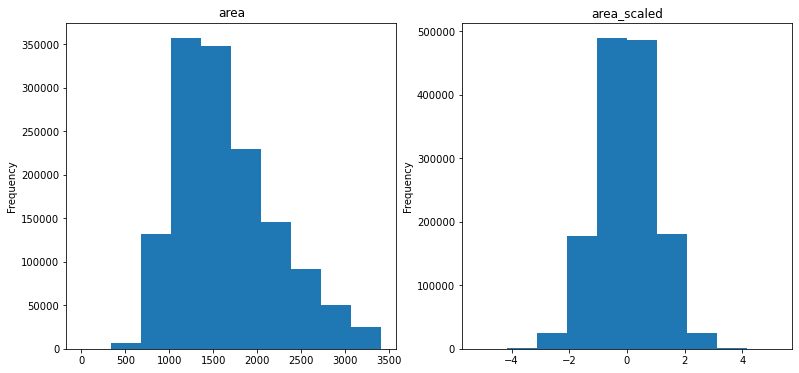

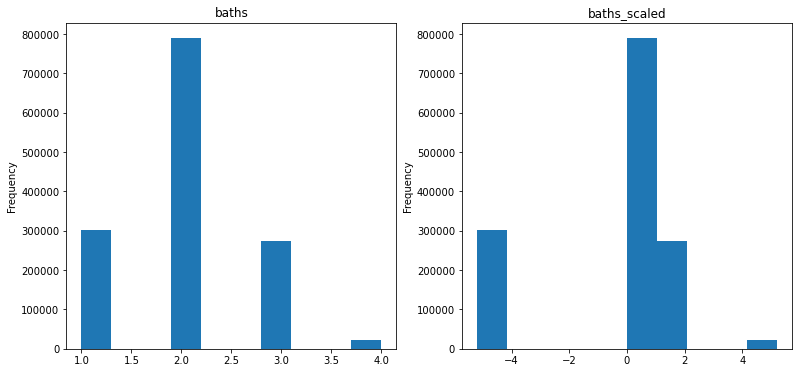

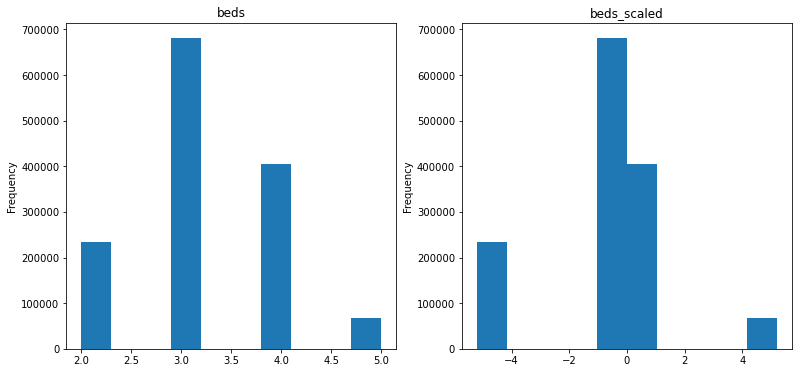

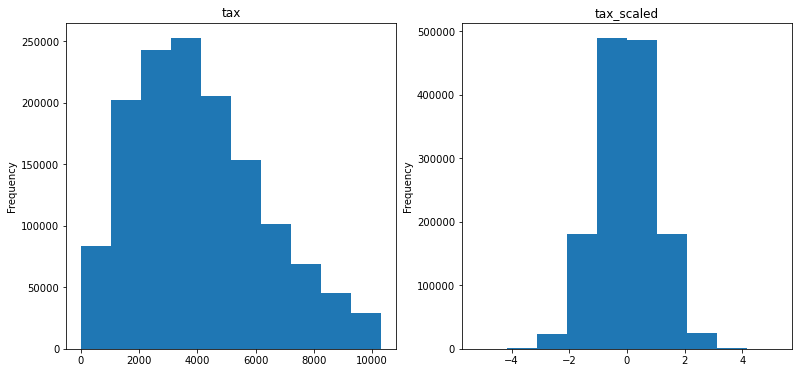

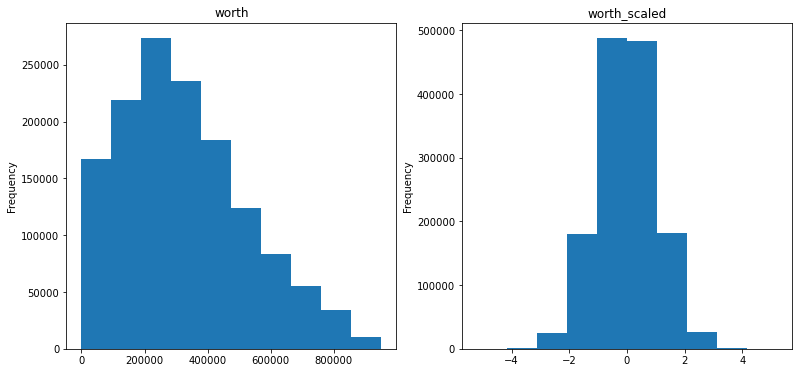

In [26]:
### Call Helper Function To Plot Scaled/Unscaled Distributions ###
plot_scaled_unscaled(trained_QT)

# #4
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [27]:
### Construct, Fit, and Transform QuantileTransformer without output_distribution ###
train_QT = QuantileTransformer()
train_QT.fit(train[cols])
trained_QT = train[cols].copy()
trained_QT[cols_scaled] = train_QT.transform(train[cols])

trained_QT.head()

,beds,baths,area,worth,tax,beds_scaled,baths_scaled,area_scaled,worth_scaled,tax_scaled
783044,4,2,2803,104591,1479.32,0.805305,0.504505,0.954733,0.137357,0.131829
1083951,4,2,1505,216698,2851.41,0.805305,0.504505,0.470971,0.334418,0.334728
1061250,3,2,1299,65230,919.28,0.413914,0.504505,0.305305,0.057745,0.038285
1538638,4,2,3005,125194,1322.98,0.805305,0.504505,0.976067,0.170020,0.109030
1185559,3,2,1310,153604,1878.88,0.413914,0.504505,0.315315,0.215459,0.182720


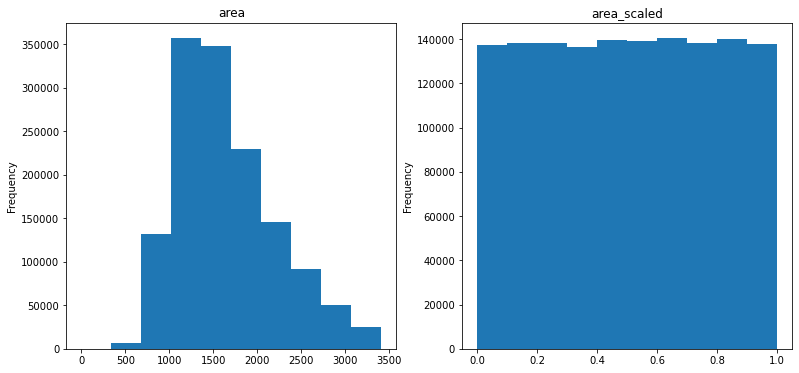

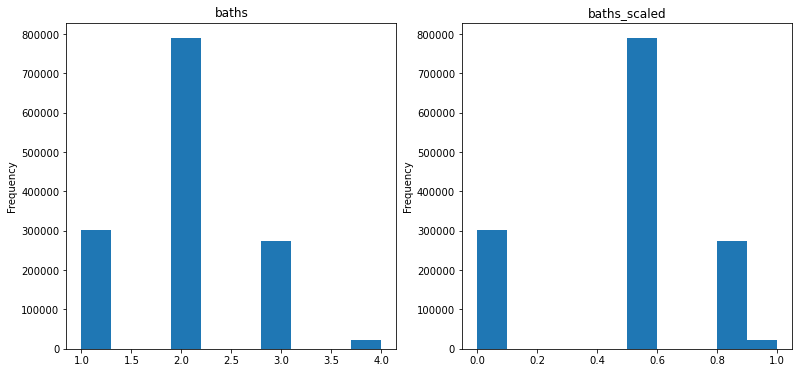

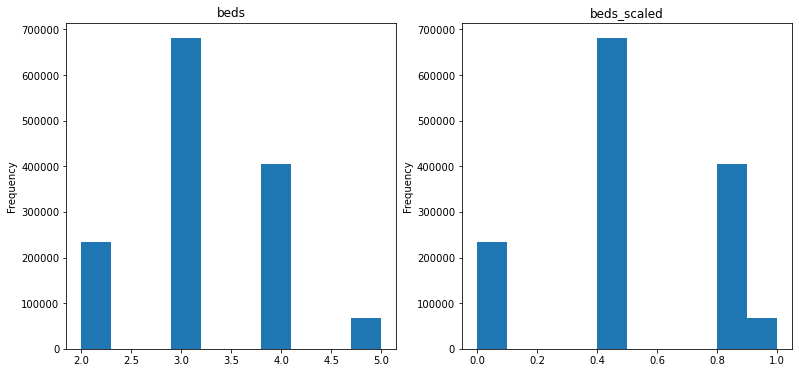

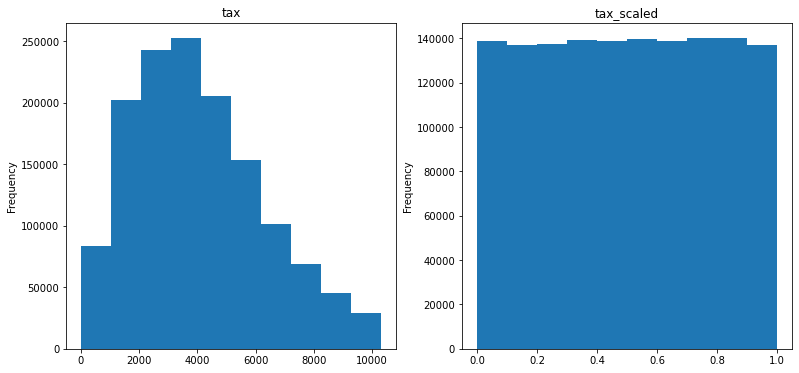

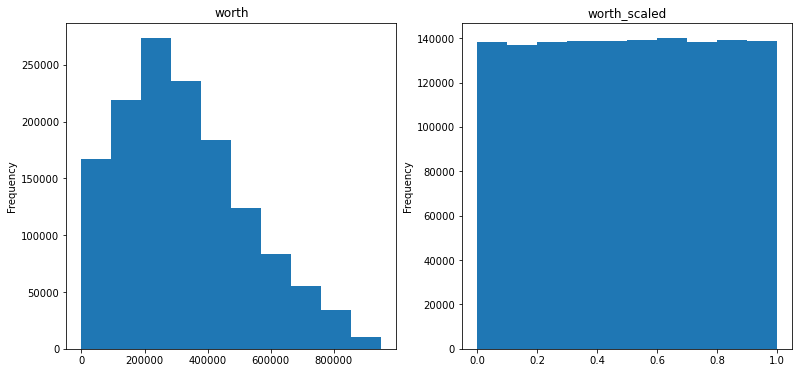

In [28]:
### Call Helper Function To Plot Scaled/Unscaled Distributions ###
plot_scaled_unscaled(trained_QT)

# #5
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [29]:
train.shape, validate.shape, test.shape

((1386340, 7), (189047, 7), (214826, 7))

In [30]:
train[cols].shape

(1386340, 5)

In [31]:
scaledtrain, scaledvalidate, scaledtest = zillow_standard_scaler(train, validate, test)

In [32]:
scaledtrain.shape, scaledvalidate.shape, scaledtest.shape

((1386340, 10), (189047, 10), (214826, 10))